# HR Analytics Project- Understanding the Attrition in HR.<br>
## Problem Statement:<br>
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?<br>

## HR Analytics<br>

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.<br>

## Attrition in HR<br>

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.<br>

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.<br>

## Attrition affecting Companies<br>

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.<br>

 

# IMPORTING DATA AND LIBRARIES.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('IBM_HR_Attrition_Rate_Analytics.csv.csv')

Imported Data and Libraries.

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are **1470 Rows** and **35 Columns**. Attrition would be our targer features. This is a classification problem.<br>
As we have multiple features we will understand each feature one by one to understand our data.<br>

There are 9 Object datatype and suggest categorical data. All the other data type are integers.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

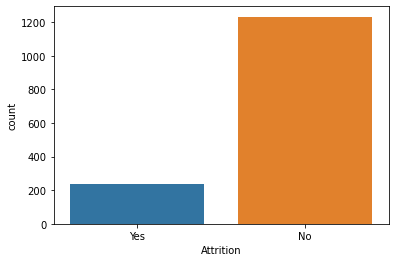

In [5]:
sns.countplot(df['Attrition'])

In [6]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

This is clearly a **Data Imbalance problem** with only 237 entries for "Yes" Attrition and 1233 entries for "No".<br>
We will need to deal with data imbalance problem before model building.

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There aren't any null values.

# EDA AND PREPROCESSING.

In [8]:
list1 = ['BusinessTravel', 'Department', 'EducationField', 'Gender']
list_1 = ['JobRole', 'MaritalStatus', 'Over18', 'OverTime']

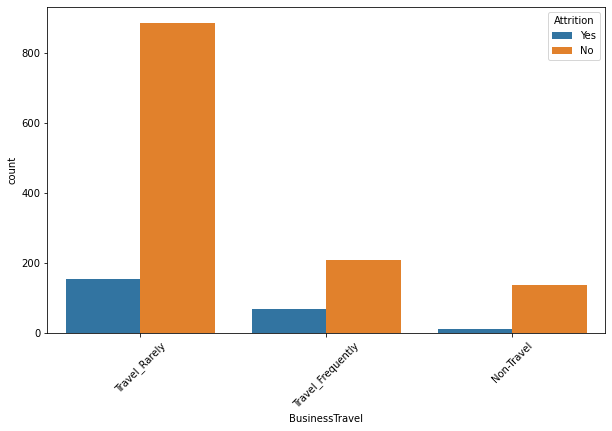

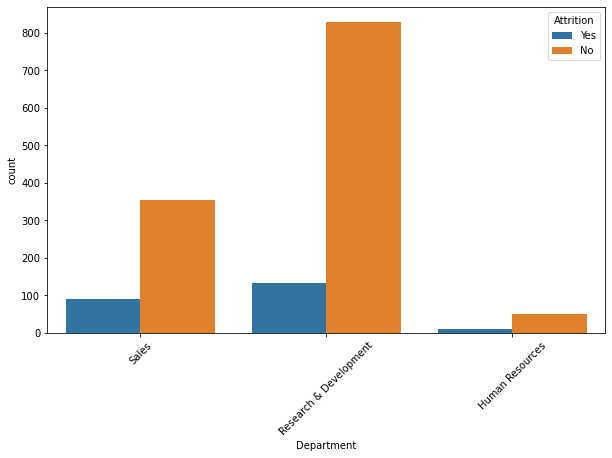

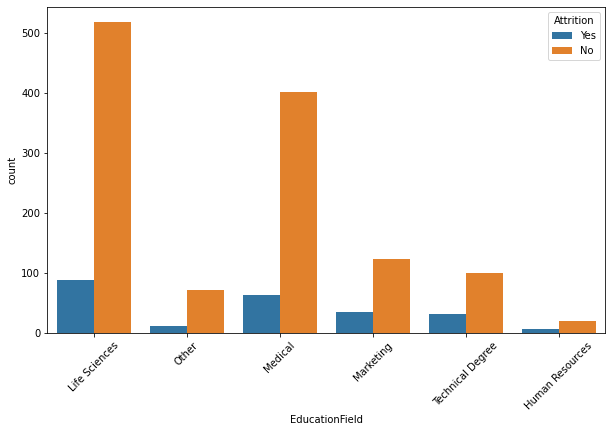

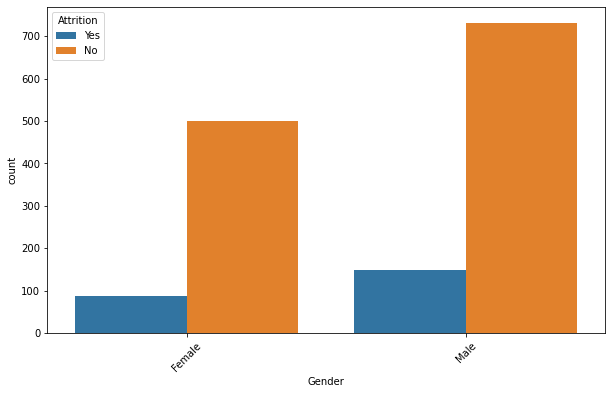

In [9]:
for i in list1:
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=45)
    sns.countplot(df[i], hue=df['Attrition'])

**Observations:**<br>
    1) Rarely travelling employees have more attrition.<br>
    2) Sales category seem to have more attrition comparetively. <br>
    3) Life Science and Medical have very less attrition.<br>
    4) Comparatively Females have more Attrition.
    

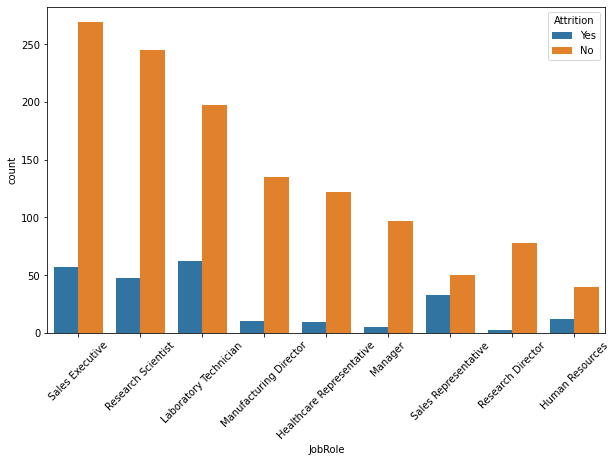

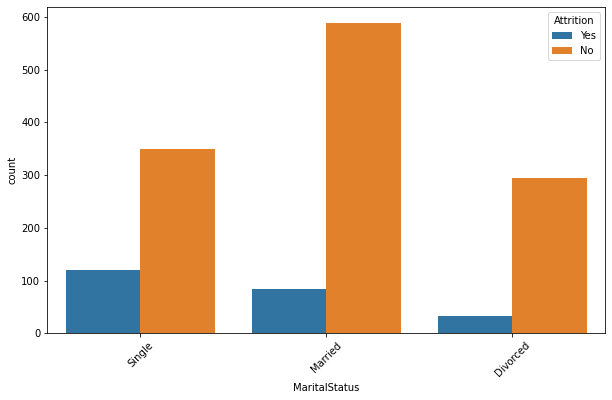

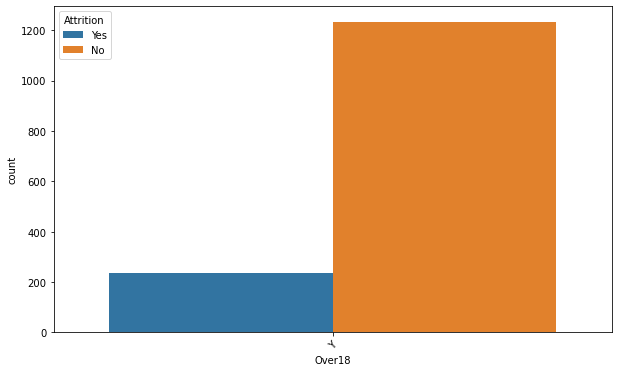

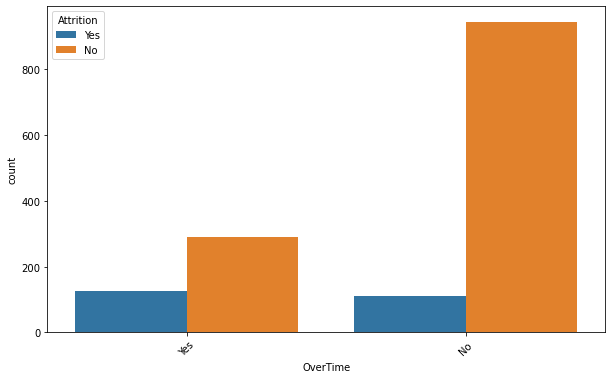

In [10]:
for i in list_1:
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=45)
    sns.countplot(df[i], hue=df['Attrition'])

**Observations:**<br>
    1) Clearly sales representative has more attrition.<br>
    2) Single employees has more attrition comparetively.<br>
    3) We will drop Over18 column as it has only 1 value.<br>
    4) if asked to do over time employees show attrition.
    

In [11]:
df.drop('Over18', axis=1, inplace=True)

In [12]:
list2 = ['Age', 'DailyRate','DistanceFromHome', 'Education']
list3 = ['EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel']
list4 = ['JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked'] 
list5 = ['PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours']
list6 = ['StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance']
list7 = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

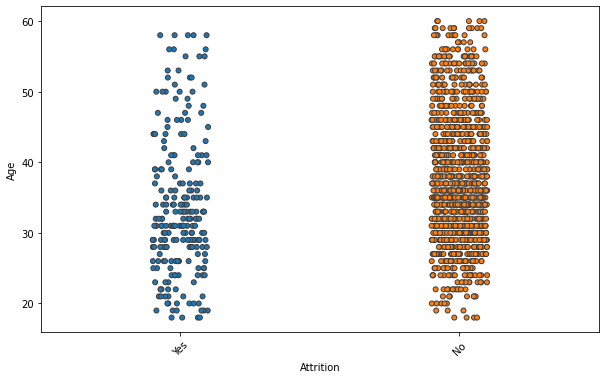

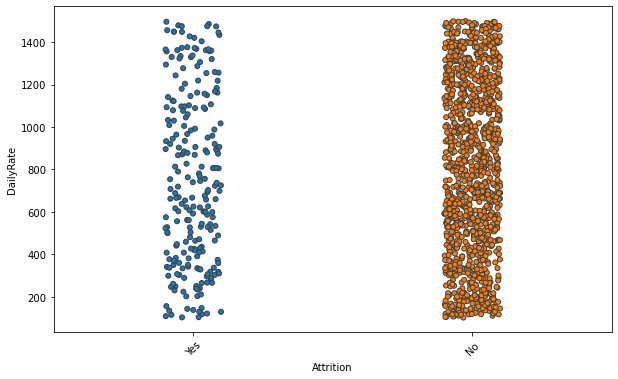

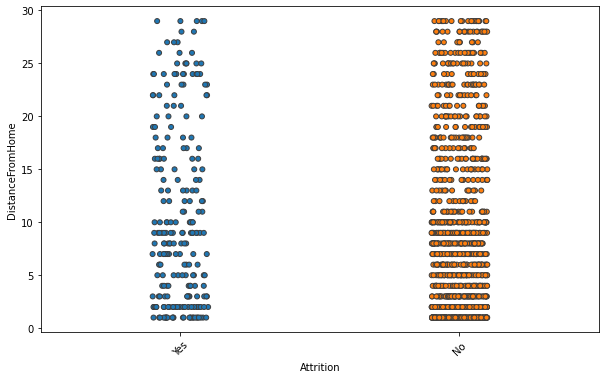

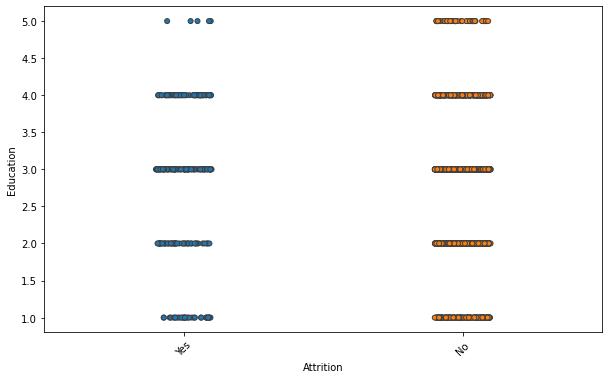

In [13]:
for i in list2: 
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=45)
    sns.stripplot(df['Attrition'], df[i], linewidth=1)

<AxesSubplot:xlabel='Education', ylabel='count'>

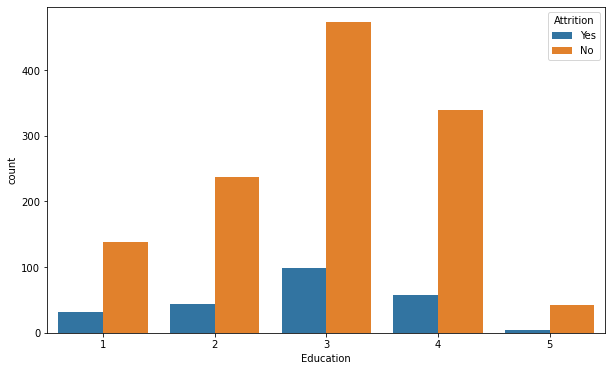

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(df['Education'], hue=df['Attrition'])

**Observations:**<br>
    1) Employees between age 25-35 tends to have more attrition. <br>
    2) Dailyrate seems equal owing to the class imbalance.<br>
    3) If distance from home id under 3-4 then there seem to be attrition. <br>
    4) Comparetively all the categories seem equal. Eductaion with 3 has more no Attrition.

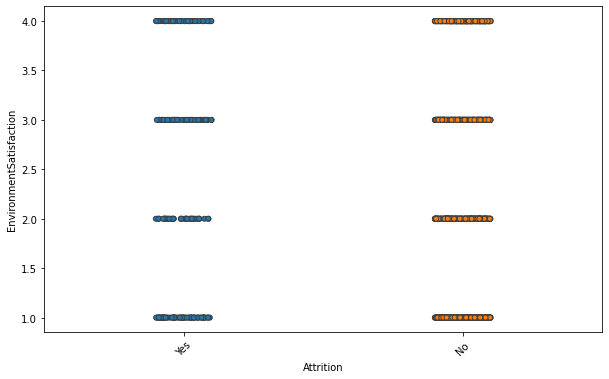

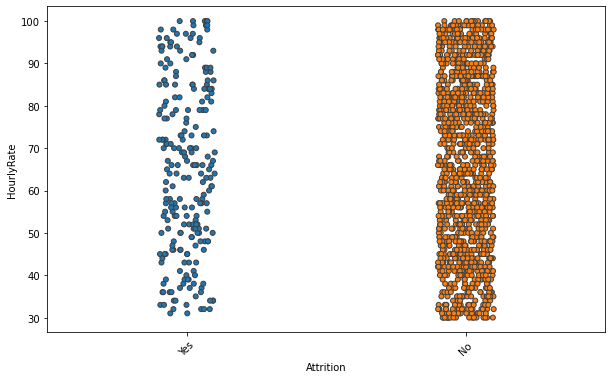

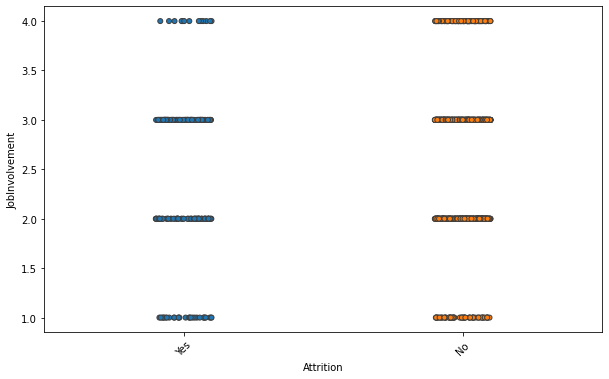

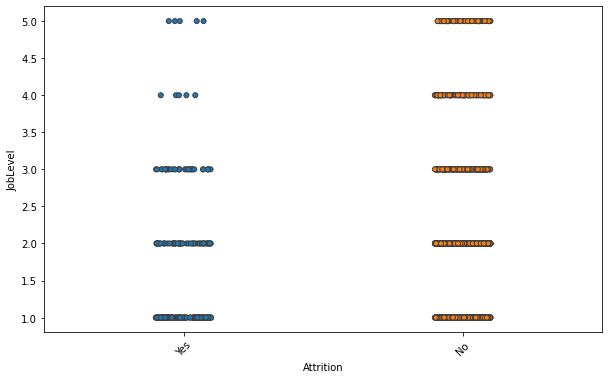

In [15]:
for i in list3:
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=45)
    sns.stripplot(df['Attrition'], df[i], linewidth=1)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

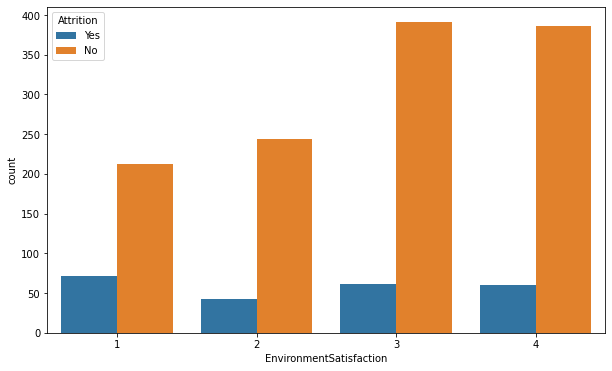

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(df['EnvironmentSatisfaction'], hue=df['Attrition'])

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

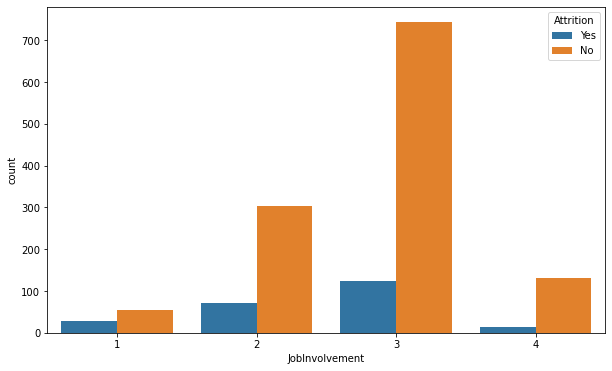

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(df['JobInvolvement'], hue=df['Attrition'])

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

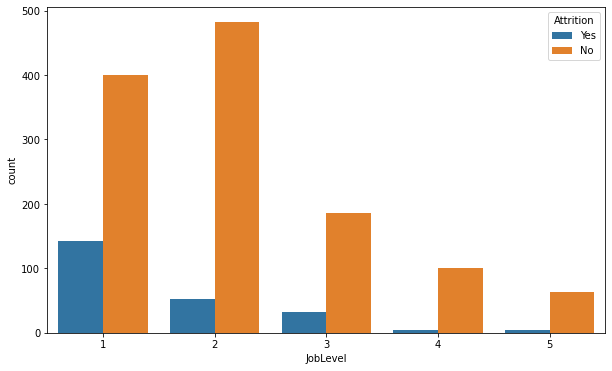

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df['JobLevel'], hue=df['Attrition'])

**Observations:**<br>
    1) EnvironmentSatisfaction has more no Attrition for 3 and 4 categories. <br>
    2) Hourly rate seem equal in both the classes.<br>
    3) JobInvolvement is more in 2, 3 and 4. More attrition in 1 category.<br>
    4) JobLevel 1 has more attrition.

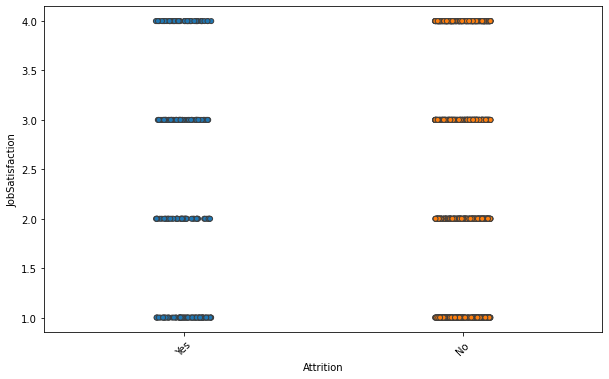

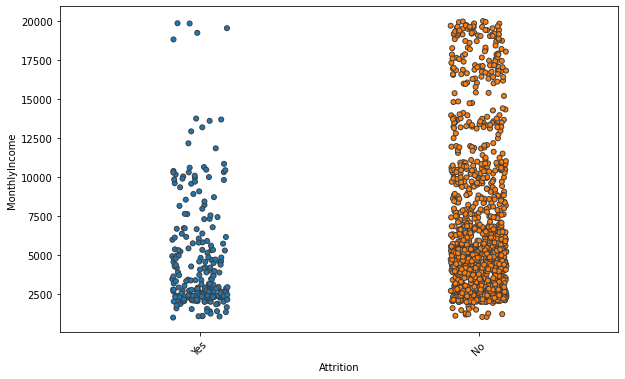

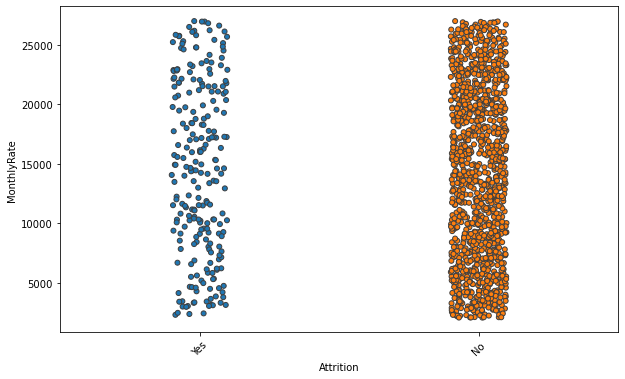

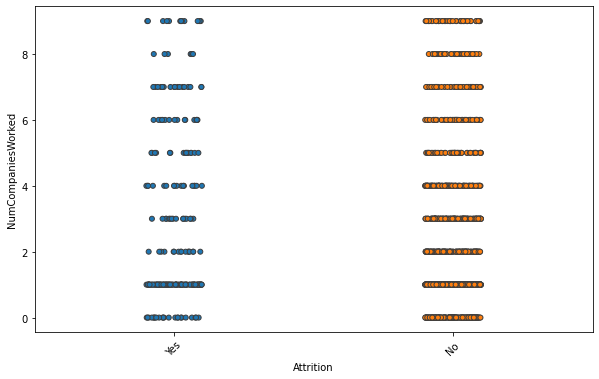

In [19]:
for i in list4: 
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=45)
    sns.stripplot(df['Attrition'], df[i], linewidth=1)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

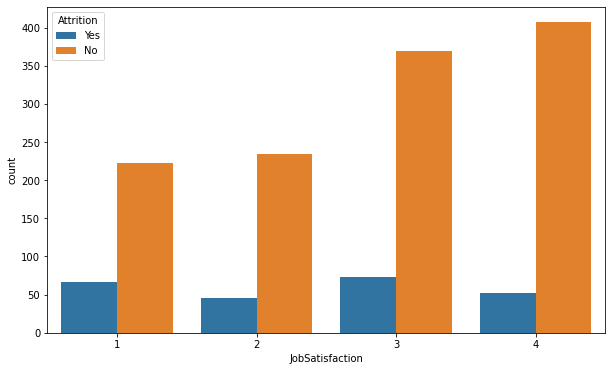

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(df['JobSatisfaction'], hue=df['Attrition'])

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

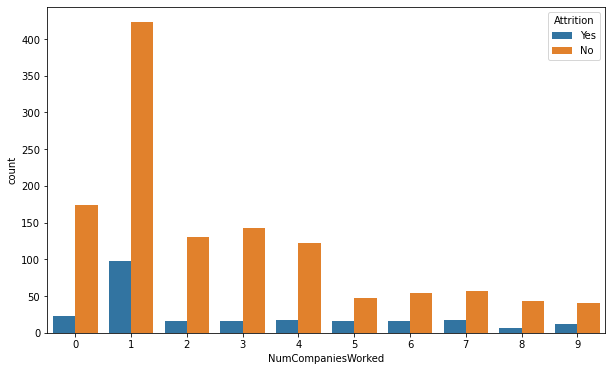

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(df['NumCompaniesWorked'], hue=df['Attrition'])

**Observations:**<br>
    1) JobSatisfaction is comparetively less in category 1.<br>
    2) Employees with less Monthly income category has more attrition. <br>
    3) Monthly rate seem equal.<br>
    4) Employees worked in 1 companies have more attrition.

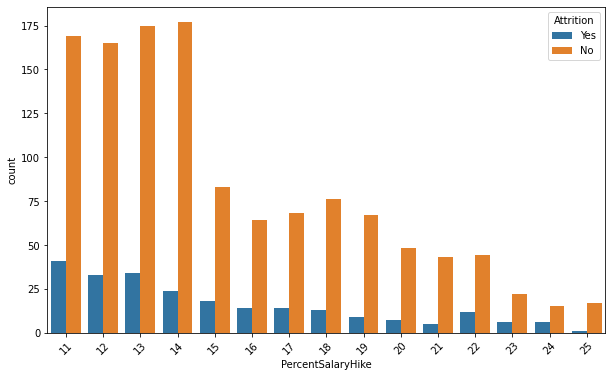

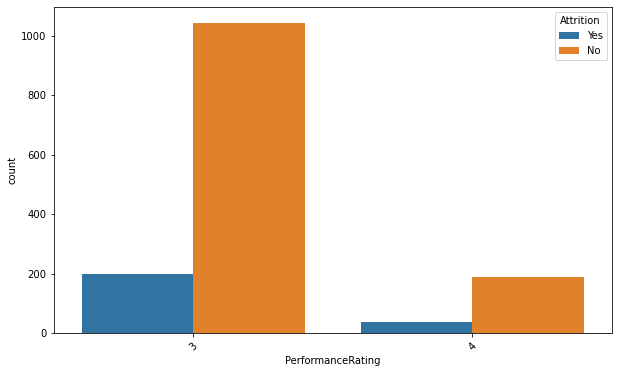

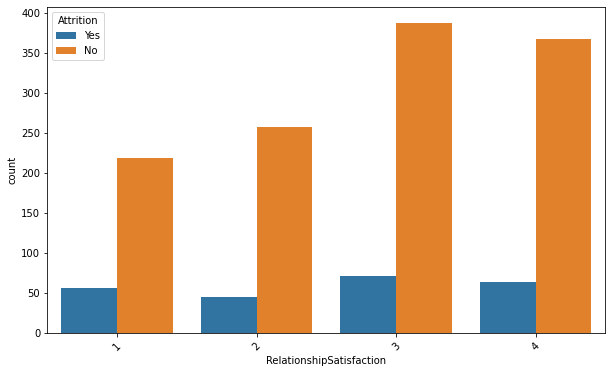

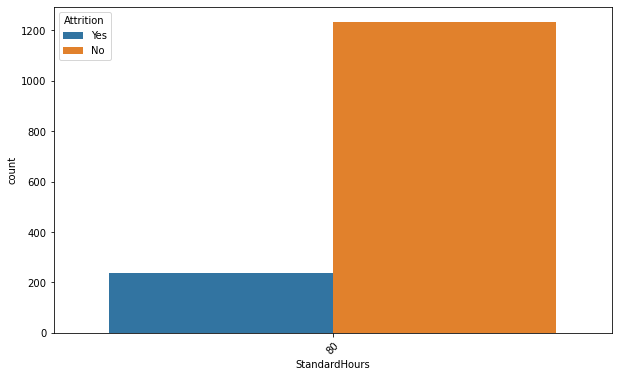

In [22]:
for i in list5: 
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=45)
    sns.countplot(df[i], hue=df['Attrition'])

**Observations:**<br>
    1) Less percent Salary hike directs to more attrition.<br>
    2) Performance rating 3 has very less attrition.<br>
    3) RelationShip Satisfaction 3 has very less attrition.<br>
    4) Standard hours has only one values so we will drop the column.
    

In [23]:
df.drop('StandardHours', axis=1, inplace=True)

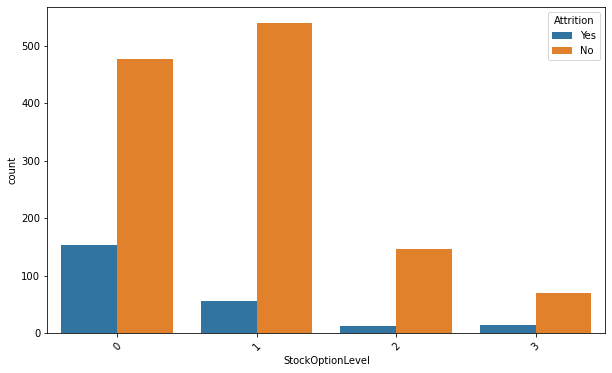

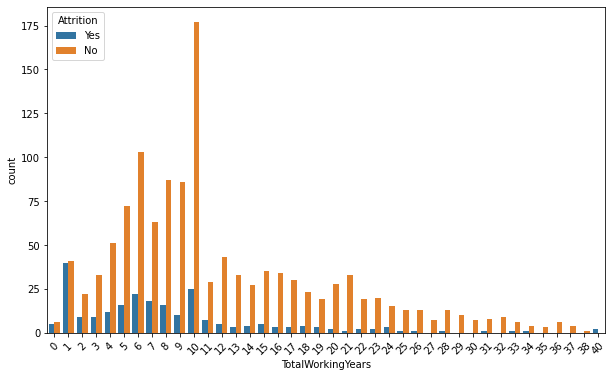

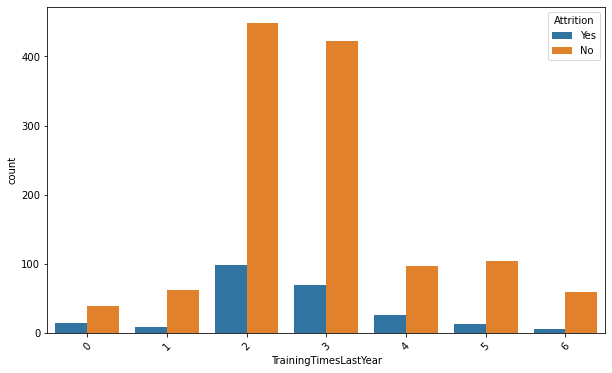

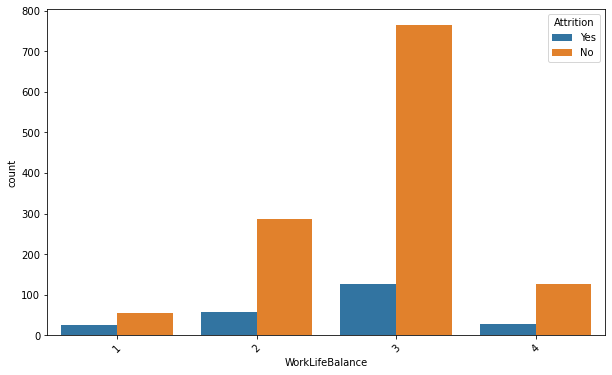

In [24]:
for i in list6: 
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=45)
    sns.countplot(df[i], hue=df['Attrition'])

**Observations:**<br>
    1) Stock option level 0 has more attrition.<br>
    2) Employees working for 0-1 years have more attrition. <br>
    3) Training time last years has more attrition for 2 and 3. <br>
    4) Work life balance for 1 and 4 category has  more attrition.

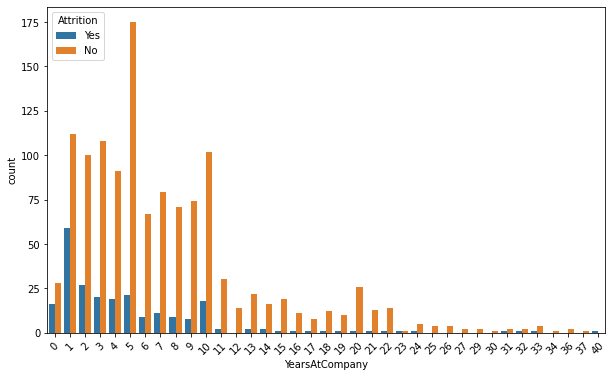

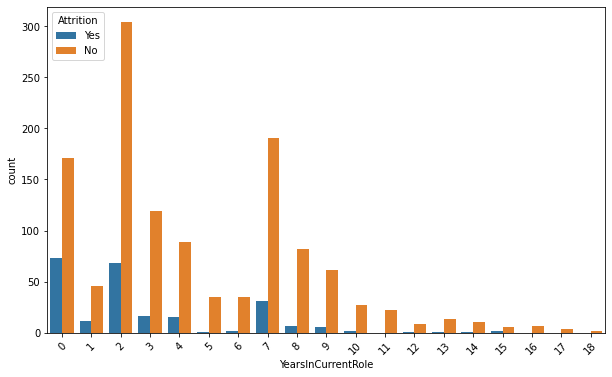

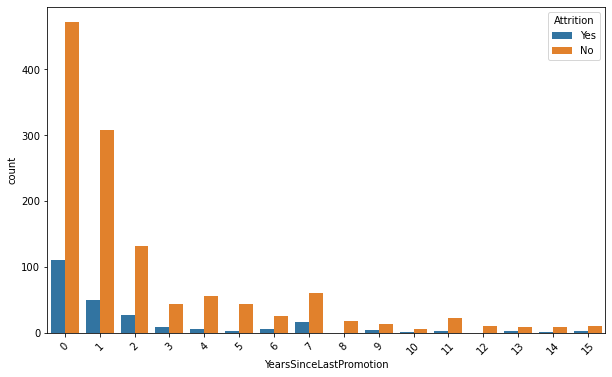

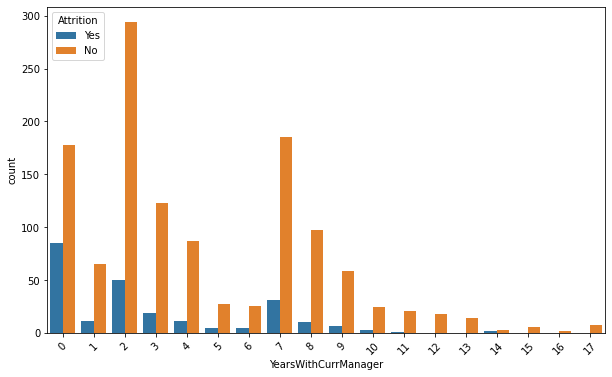

In [25]:
for i in list7: 
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=45)
    sns.countplot(df[i], hue=df['Attrition'])

**Observations:**<br>
    1) As the years at complany increases the attrition decreases.<br>
    2) For years 0, 1 and 2 the attrition is more. <br>
    3) More attrition in year 0, 1,2 since last promotion <br>
    4) Same is with column YearsWithCurrManager.

In [26]:
df.drop('EmployeeCount', axis=1, inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

<AxesSubplot:>

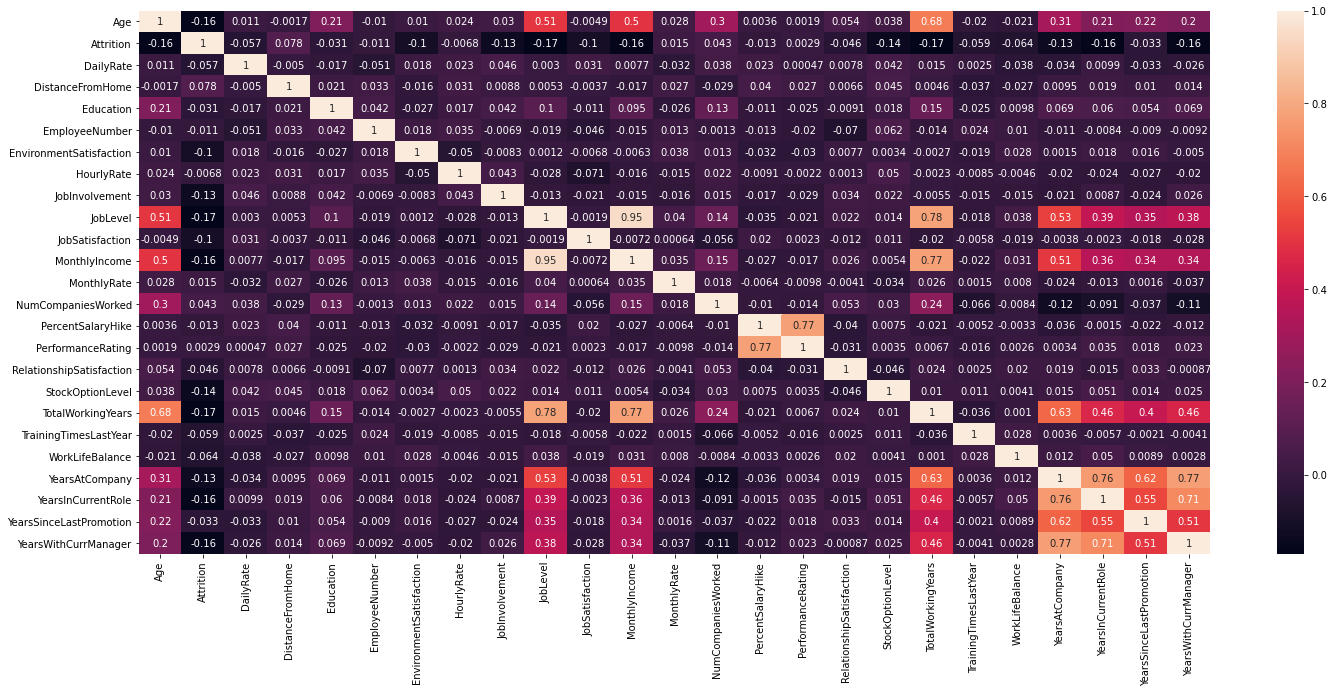

In [28]:
plt.figure(figsize=(24,10))
sns.heatmap(df.corr(), annot=True)

There are few columns which have very less correlation.

In [29]:
corr_relation = df.corr()
corr_relation['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64

We will remove columns PerformanceRating, HourlyRate and EmployeeNumber as they have least correlation.

In [30]:
df.drop(['PerformanceRating', 'HourlyRate', 'EmployeeNumber'], axis=1, inplace=True)

**Note:** Attrition 1 indicate Yes and 0 indicate No

In [31]:
len(df.columns)

29

# SKEWNESS AND OUTLIERS.

Let's check the skewnees of the data.

In [32]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

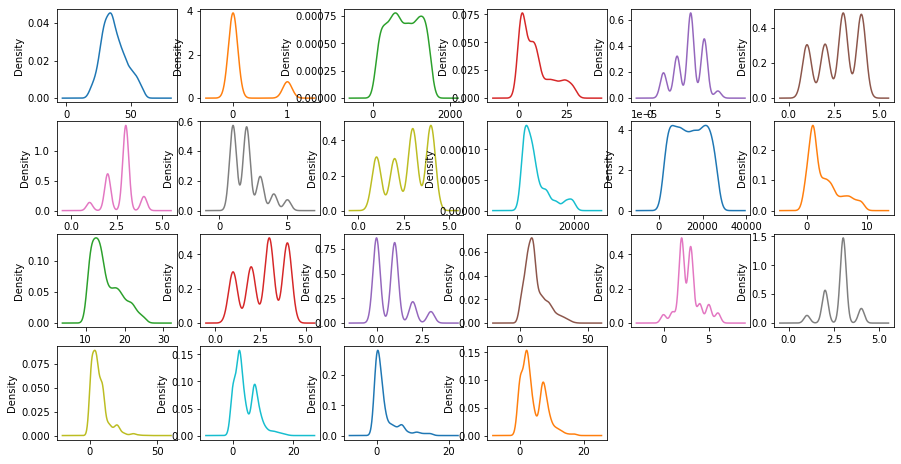

In [33]:
df.plot(kind="density", subplots =True, layout=(5,6), sharex=False, legend =False, figsize=(15,10))
plt.show()

Outliers in data set

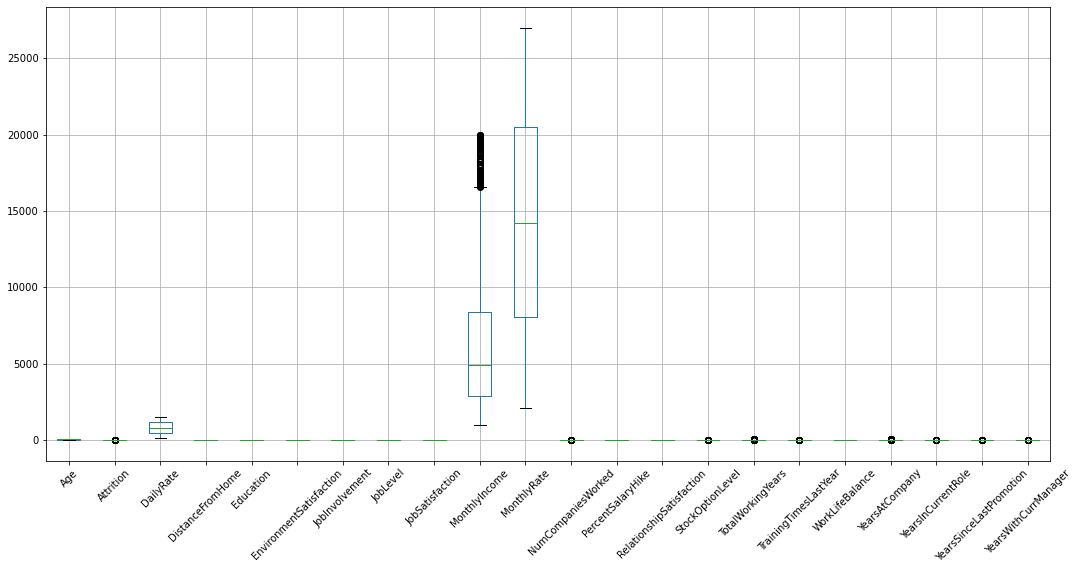

In [34]:
df.boxplot(figsize=(18,10))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

Montly income columns have outliers, however, close to the wishker.

In [35]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

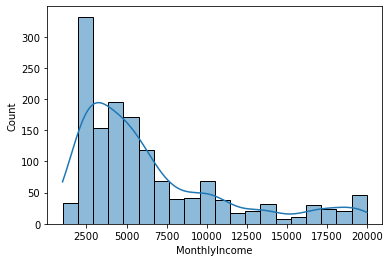

In [36]:
sns.histplot(df['MonthlyIncome'], kde=True)

In [37]:
df.select_dtypes(include = ['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


## Using get_dummies on Object data type columns.

Converting Object datatype Columns using get_dummies, which is equal to OneHotEncoding. We are using this technique and not LabelEncoding as we do not want our model to absorb these values as **Ordinal Values**. OneHotEncoding or get_dummies prevent that.

In [38]:
dummies = pd.get_dummies(df[['BusinessTravel', 'Department','EducationField', 'Gender','JobRole','MaritalStatus','OverTime']], drop_first=True)

In [39]:
dummies

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1466,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1467,0,1,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
1468,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [40]:
df.drop(['BusinessTravel', 'Department','EducationField', 'Gender','JobRole','MaritalStatus','OverTime'],axis=1,inplace=True)

In [41]:
merged = pd.concat([df,dummies], axis='columns')

##  Handling outliers

In [42]:
from scipy.stats import zscore
z = np.abs(zscore(merged))
z

array([[0.4463504 , 2.28090588, 0.74252653, ..., 0.91892141, 1.45864991,
        1.59174553],
       [1.32236521, 0.4384223 , 1.2977746 , ..., 1.08823234, 0.68556546,
        0.62824112],
       [0.008343  , 2.28090588, 1.41436324, ..., 0.91892141, 1.45864991,
        1.59174553],
       ...,
       [1.08667552, 0.4384223 , 1.60518328, ..., 1.08823234, 0.68556546,
        1.59174553],
       [1.32236521, 0.4384223 , 0.54667746, ..., 1.08823234, 0.68556546,
        0.62824112],
       [0.32016256, 0.4384223 , 0.43256792, ..., 1.08823234, 0.68556546,
        0.62824112]])

In [43]:
Thresold = 3
print(np.where(z>3))

(array([   2,    8,   15,   18,   20,   20,   21,   22,   25,   25,   28,
         29,   31,   33,   33,   36,   37,   40,   45,   45,   45,   51,
         55,   59,   60,   62,   62,   62,   63,   64,   64,   65,   66,
         75,   77,   77,   78,   79,   84,   85,   85,   86,   86,   95,
         95,   96,   98,   98,  100,  103,  105,  106,  110,  112,  116,
        117,  119,  123,  123,  123,  123,  125,  126,  126,  126,  127,
        128,  129,  134,  135,  136,  139,  142,  145,  147,  152,  153,
        155,  155,  156,  159,  165,  170,  171,  171,  178,  182,  184,
        186,  187,  187,  187,  188,  190,  190,  190,  192,  194,  197,
        198,  199,  199,  200,  200,  201,  211,  213,  214,  215,  217,
        218,  222,  222,  224,  226,  231,  231,  231,  231,  232,  233,
        235,  237,  237,  237,  238,  243,  244,  244,  245,  247,  249,
        250,  251,  255,  257,  262,  263,  263,  270,  270,  270,  271,
        275,  276,  278,  279,  280,  281,  283,  

In [44]:
data = merged[(z<3).all(axis=1)]

In [45]:
data.shape

(832, 43)

In [46]:
merged.shape

(1470, 43)

Using zscore method, we are losing so much of data. We will use IQR method.

# Handling Outliers and skewness using IQR method.

In [47]:
#function for detecting outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*1.5)
    return(lower_bridge,upper_bridge)

#function for detecting outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
    return(lower_bridge,upper_bridge)

#function for detecting outliers when feature has Normally Distributed (by mean-+3dtf)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return(lower_boundary,upper_boundary)

#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

#function for Exponential transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")
        plt.show()

#function for Box cox transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")
        plt.show()

def log1p_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    data_frame_copy[feature_name] = np.log1p(data_frame_copy[feature_name])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame_copy[feature_name].hist()
    plt.title("log1p_transform")
    plt.show()

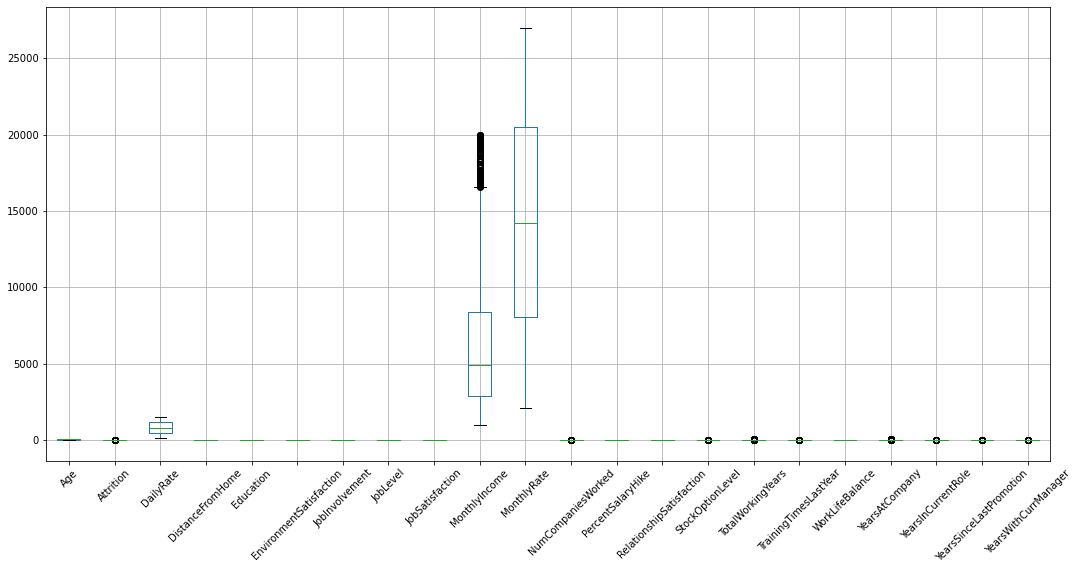

In [48]:
df.boxplot(figsize=(18,10))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

Used df data frame to plot box plot.

## Column Age

In [49]:
merged['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

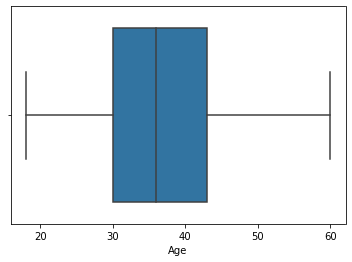

In [50]:
sns.boxplot(merged['Age'])

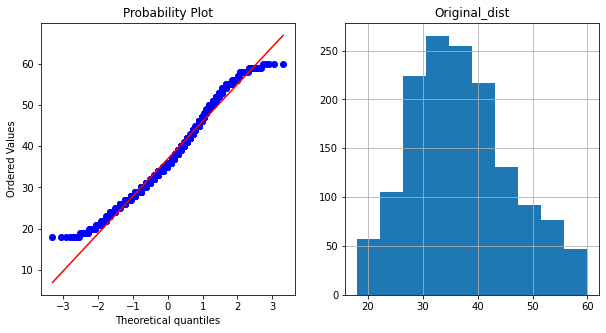

In [51]:
original_dist(merged, 'Age')

In [52]:
merged['Age'].skew()

0.4132863018563338

All good with this column.

## Column DailyRate

In [53]:
merged['DailyRate'].describe()

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

<AxesSubplot:xlabel='DailyRate'>

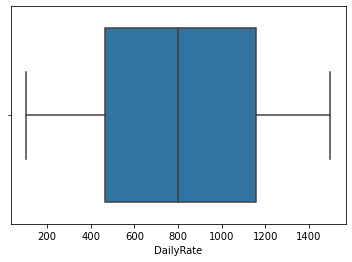

In [54]:
sns.boxplot(merged['DailyRate'])

In [55]:
merged['DailyRate'].skew()

-0.003518568352325854

All good with this column.

In [56]:
## Column DistanceFromHome

In [57]:
merged['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

<AxesSubplot:xlabel='DistanceFromHome'>

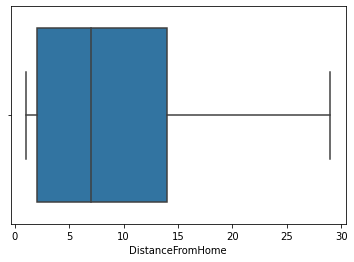

In [58]:
sns.boxplot(merged['DistanceFromHome'])

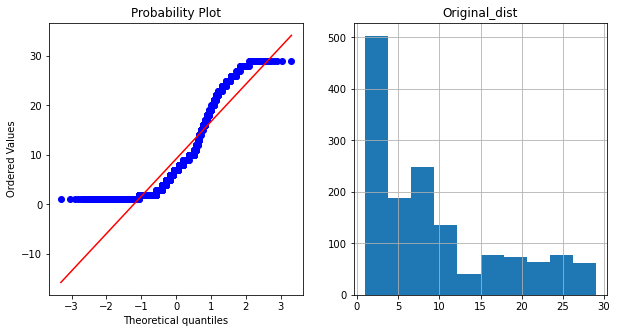

In [59]:
original_dist(merged,'DistanceFromHome')

In [60]:
merged['DistanceFromHome'].skew()

0.9581179956568269

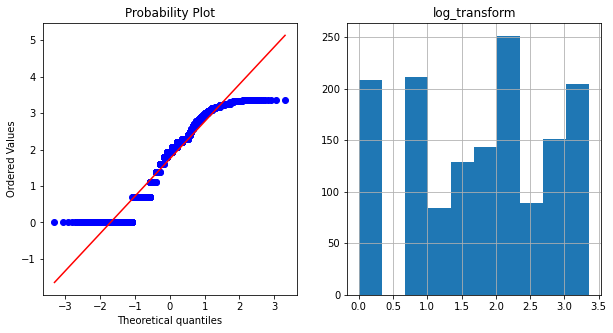

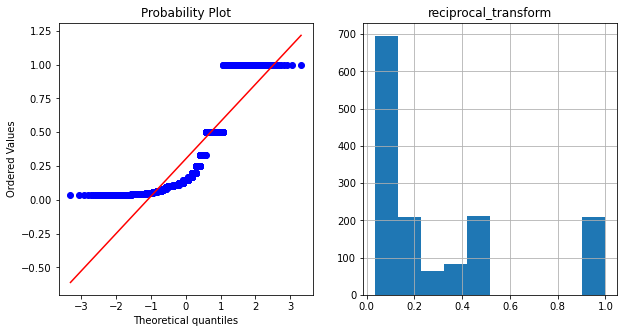

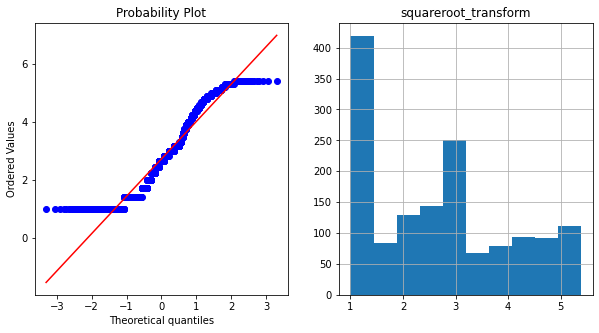

In [61]:
log_transform(merged,'DistanceFromHome')

reciprocal_transform(merged,'DistanceFromHome')

squareroot_transform(merged,'DistanceFromHome')

In [62]:
merged['DistanceFromHome'] = merged['DistanceFromHome']**(1/2)

In [63]:
(merged['DistanceFromHome']).skew()

0.3981143787046576

Treated skewness and outliers in place.

## column Education

In [64]:
merged['Education'].describe()

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

<AxesSubplot:xlabel='Education'>

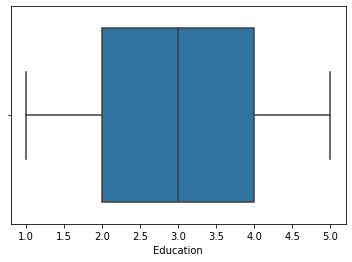

In [65]:
sns.boxplot(merged['Education'])

In [66]:
merged['Education'].skew()

-0.2896810819684331

All good with this column

In [67]:
## column EnvironmentSatisfaction

In [68]:
merged['EnvironmentSatisfaction'].describe()

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

<AxesSubplot:xlabel='EnvironmentSatisfaction'>

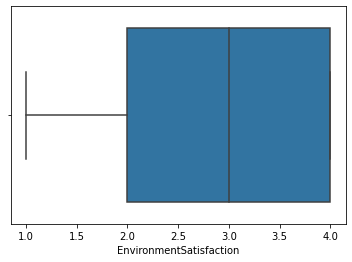

In [69]:
sns.boxplot(merged['EnvironmentSatisfaction'])

In [70]:
merged['EnvironmentSatisfaction'].skew()

-0.32165444773937907

All good with this column

## Column JobLevel

In [71]:
merged['JobLevel'].describe()

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

<AxesSubplot:xlabel='JobLevel'>

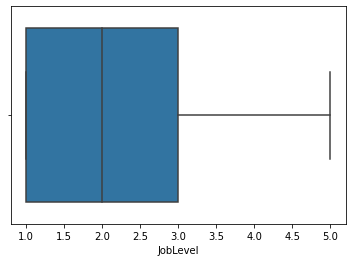

In [72]:
sns.boxplot(merged['JobLevel'])

In [73]:
merged['JobLevel'].skew()

1.0254012829518246

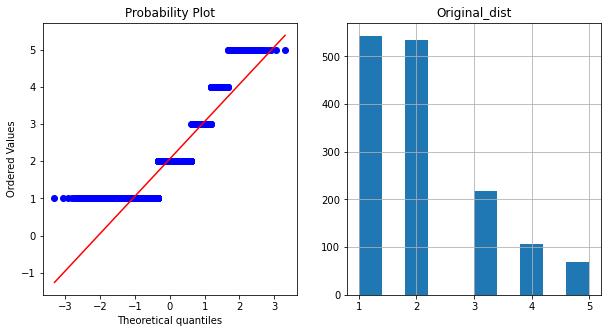

In [74]:
original_dist(merged, 'JobLevel')

This is a categorical variable , so let's move forward.

## Column MonthlyIncome

In [75]:
merged['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='MonthlyIncome'>

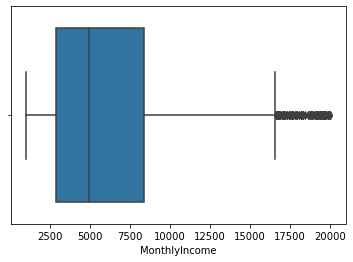

In [76]:
sns.boxplot(merged['MonthlyIncome'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

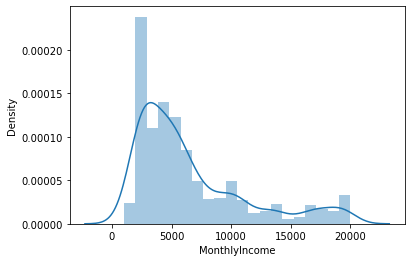

In [77]:
sns.distplot(merged['MonthlyIncome'])

In [78]:
outlier_IQR(merged, 'MonthlyIncome')

(-5291.0, 16581.0)

In [83]:
merged[merged['MonthlyIncome']>16581.0].shape

(0, 43)

In [80]:
merged = merged[merged['MonthlyIncome']<=16581.0]

Removed outliers.

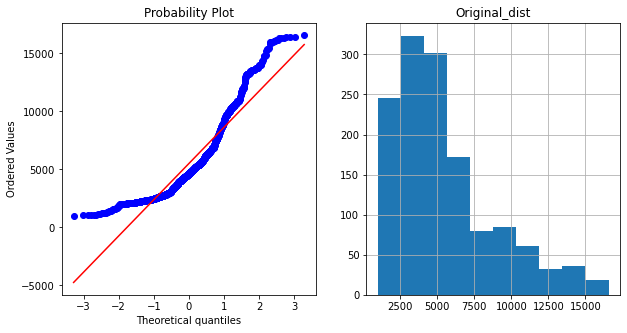

In [81]:
original_dist(merged, 'MonthlyIncome')

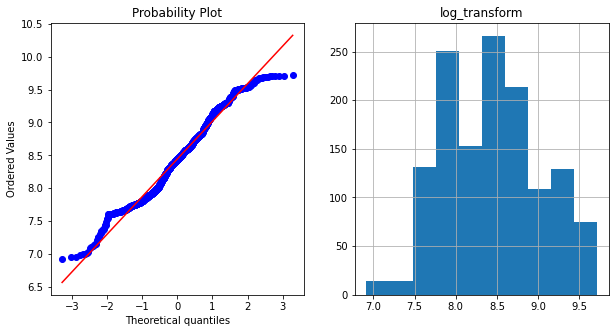

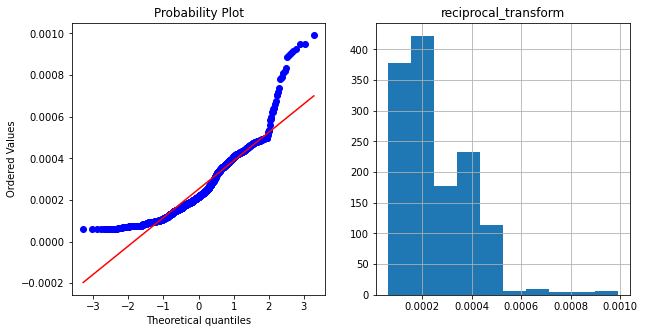

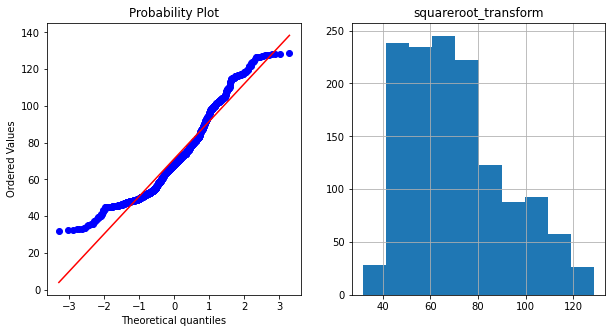

In [82]:
log_transform(merged,'MonthlyIncome')

reciprocal_transform(merged,'MonthlyIncome')

squareroot_transform(merged,'MonthlyIncome')

In [84]:
merged['MonthlyIncome'].skew()

1.194390271360848

In [85]:
merged['MonthlyIncome']= np.log(merged['MonthlyIncome'])
merged['MonthlyIncome'].skew()

0.13803246248305964

Treated Skewness

## Column NumCompaniesWorked

In [86]:
merged['NumCompaniesWorked'].describe()

count    1356.000000
mean        2.635693
std         2.488057
min         0.000000
25%         1.000000
50%         1.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

<AxesSubplot:xlabel='NumCompaniesWorked'>

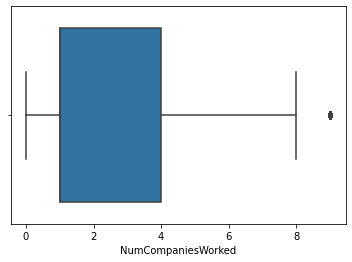

In [87]:
sns.boxplot(merged['NumCompaniesWorked'])

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

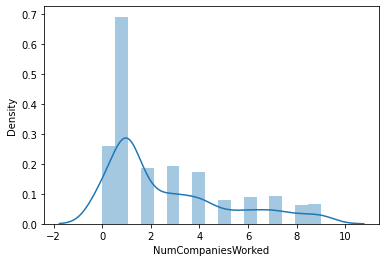

In [89]:
sns.distplot(merged['NumCompaniesWorked'])

In [90]:
outlier_IQR3(merged, 'NumCompaniesWorked')

(-8.0, 13.0)

In [91]:
merged[merged['NumCompaniesWorked']>13.0].shape

(0, 43)

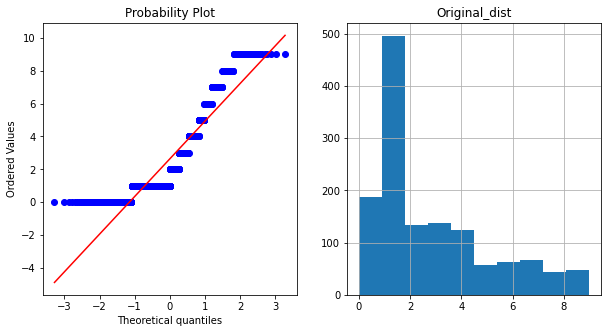

In [92]:
original_dist(merged, 'NumCompaniesWorked')

This is a categorical data. Let's move forward.

## Column PercentSalaryHike

In [94]:
merged['PercentSalaryHike'].describe()

count    1356.000000
mean       15.245575
std         3.647293
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

<AxesSubplot:xlabel='PercentSalaryHike'>

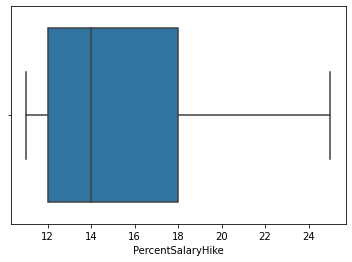

In [95]:
sns.boxplot(merged['PercentSalaryHike'])

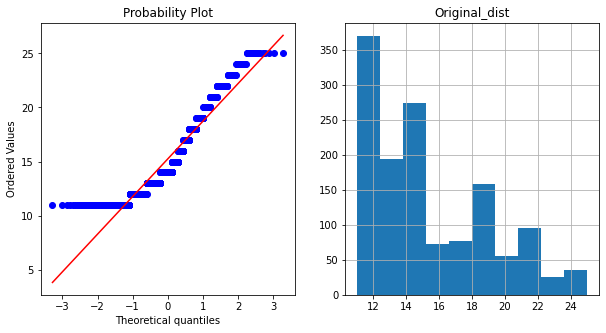

In [96]:
original_dist(merged,'PercentSalaryHike')

This is also a categorical ordinal data column.

## Column StockOptionLevel

In [97]:
merged['StockOptionLevel'].describe()

count    1356.000000
mean        0.798673
std         0.863374
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64

<AxesSubplot:xlabel='StockOptionLevel'>

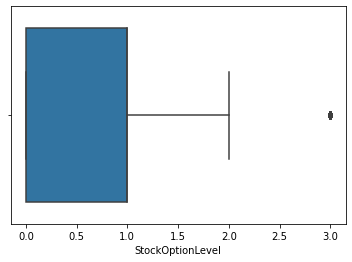

In [98]:
sns.boxplot(merged['StockOptionLevel'])

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Density'>

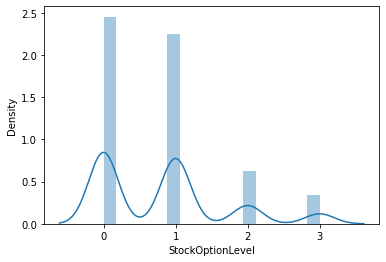

In [100]:
sns.distplot(merged['StockOptionLevel'])

In [101]:
outlier_IQR3(merged, 'StockOptionLevel')

(-3.0, 4.0)

Outlier reduction value is out of range and it is a categorical value as well. Let's move forward.

## Column TotalWorkingYears

In [102]:
merged['TotalWorkingYears'].describe()

count    1356.000000
mean       10.036136
std         6.583958
min         0.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

<AxesSubplot:xlabel='TotalWorkingYears'>

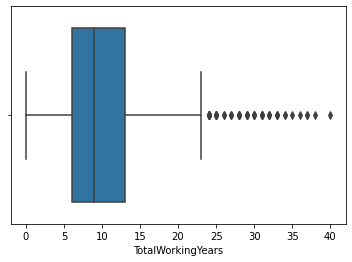

In [103]:
sns.boxplot(merged['TotalWorkingYears'])

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

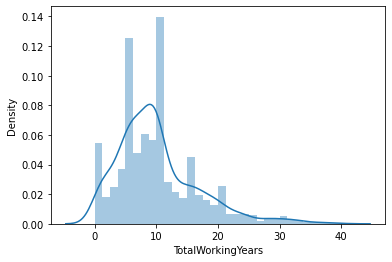

In [105]:
sns.distplot(merged['TotalWorkingYears'])

In [107]:
outlier_IQR3(merged, 'TotalWorkingYears')

(-15.0, 34.0)

In [108]:
merged[merged['TotalWorkingYears']>34.0].shape

(6, 43)

In [109]:
merged = merged[merged['TotalWorkingYears']<=34.0]

Removed outliers.

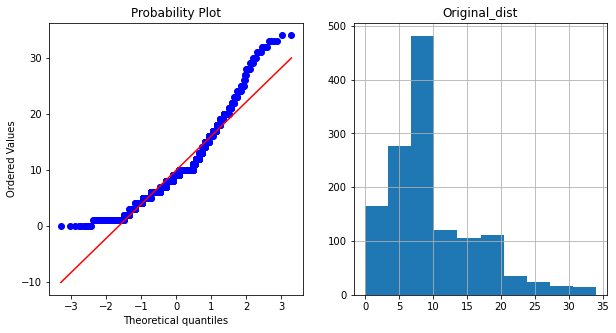

In [110]:
original_dist(merged, 'TotalWorkingYears')

This would also be a ordinal categorical variable.

Remaining columns are categorical as well, lets look at there boxplots to remove outliers.

In [111]:
box = ['TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany']
box1 = ['YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

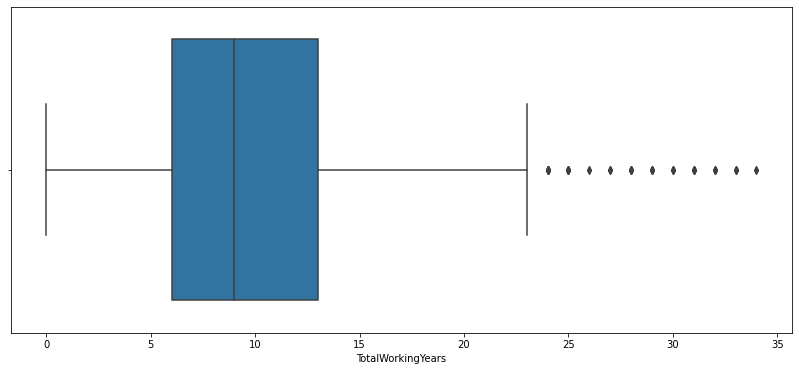

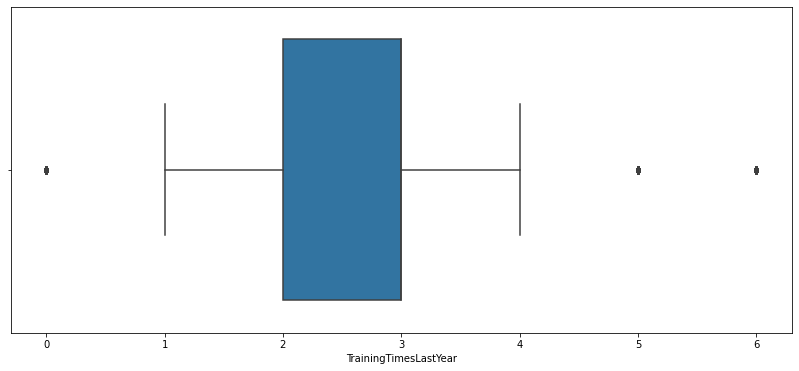

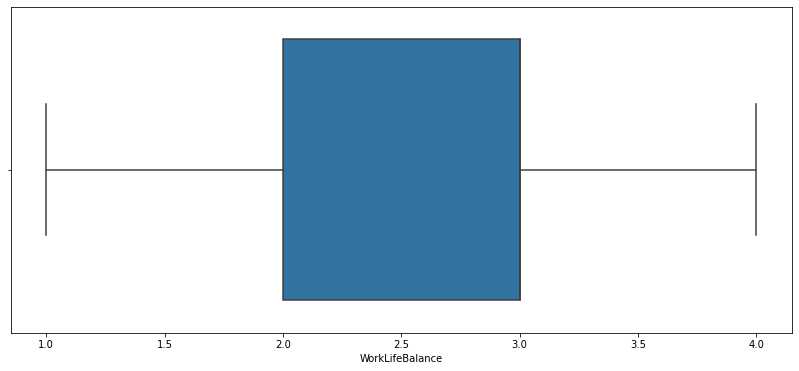

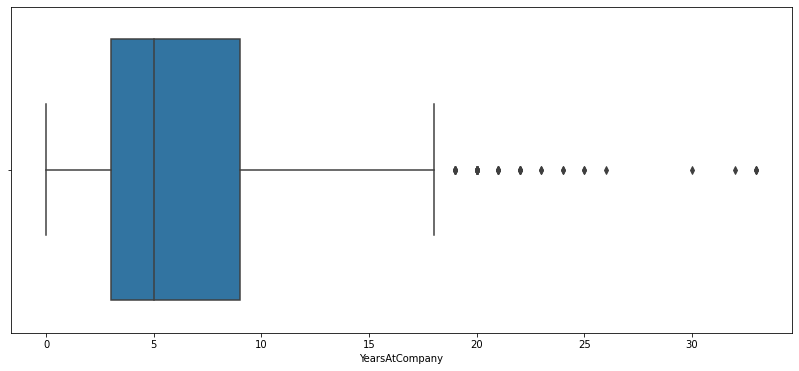

In [112]:
for i in box:
    plt.figure(figsize=(14,6))
    sns.boxplot(merged[i])

'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany' have outliers. Let's treat them.

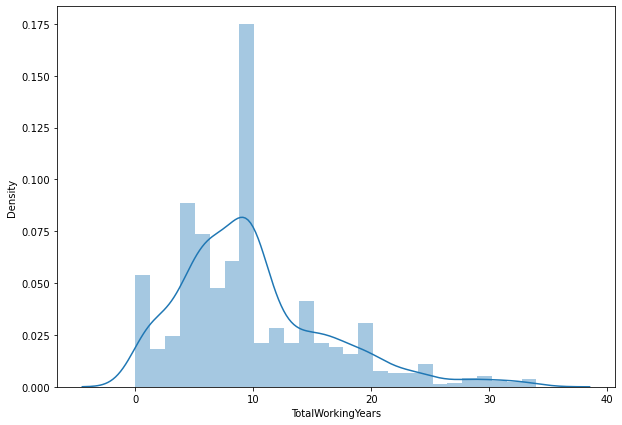

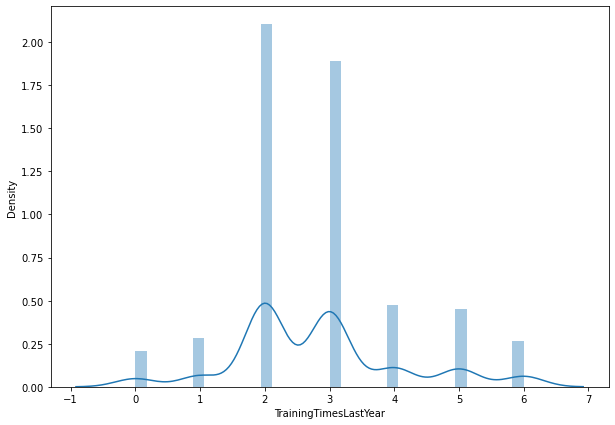

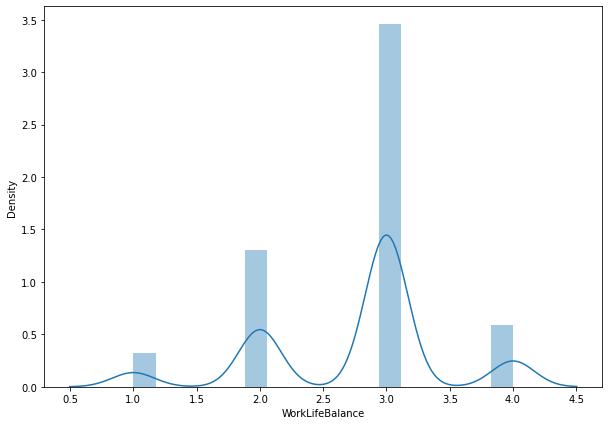

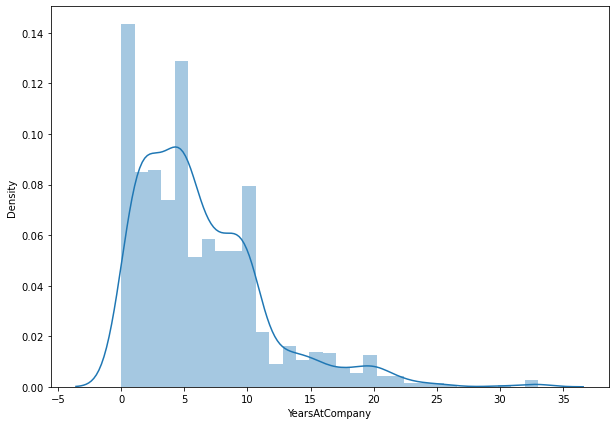

In [114]:
for i in box:
    plt.figure(figsize=(10,7))
    sns.distplot(merged[i])

In [115]:
outlier_IQR3(merged, 'TotalWorkingYears')

(-15.0, 34.0)

In [116]:
merged[merged['TotalWorkingYears']>34.0].shape

(0, 43)

In [117]:
outlier_IQR3(merged, 'TrainingTimesLastYear')

(-1.0, 6.0)

In [118]:
merged[merged['TrainingTimesLastYear']>6.0].shape

(0, 43)

In [119]:
outlier_IQR3(merged, 'YearsAtCompany')

(-15.0, 27.0)

In [120]:
merged[merged['YearsAtCompany']>27.0].shape

(5, 43)

In [121]:
merged = merged[merged['YearsAtCompany']<=27.0]

Treated outliers.

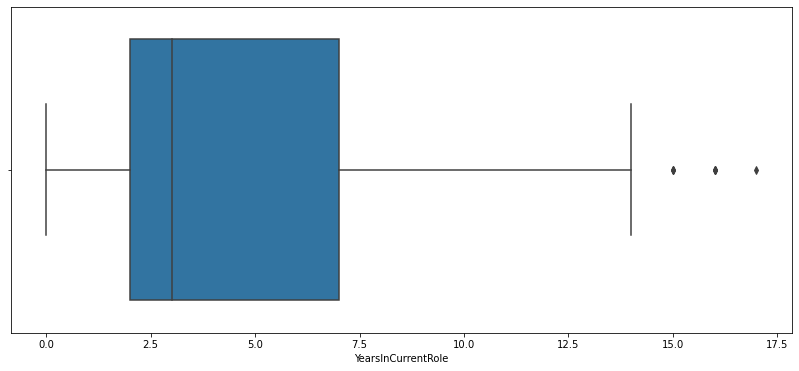

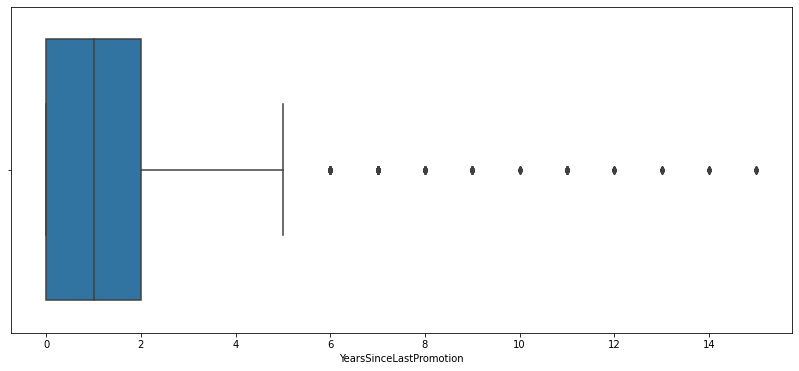

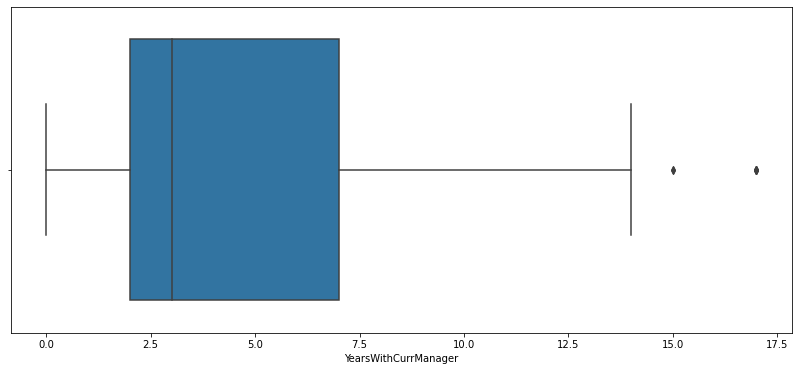

In [122]:
for i in box1:
    plt.figure(figsize=(14,6))
    sns.boxplot(merged[i])

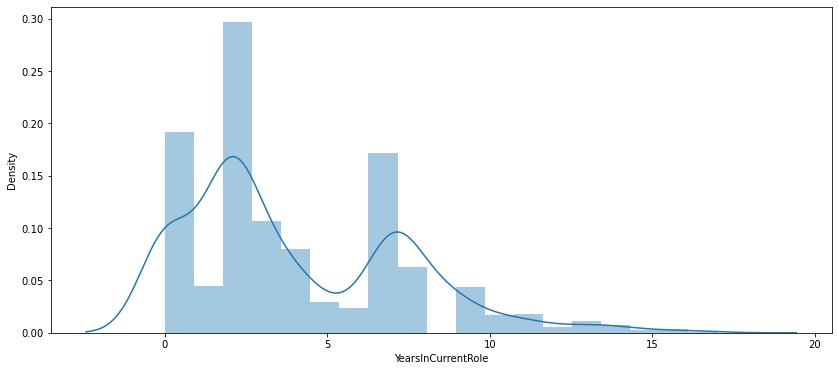

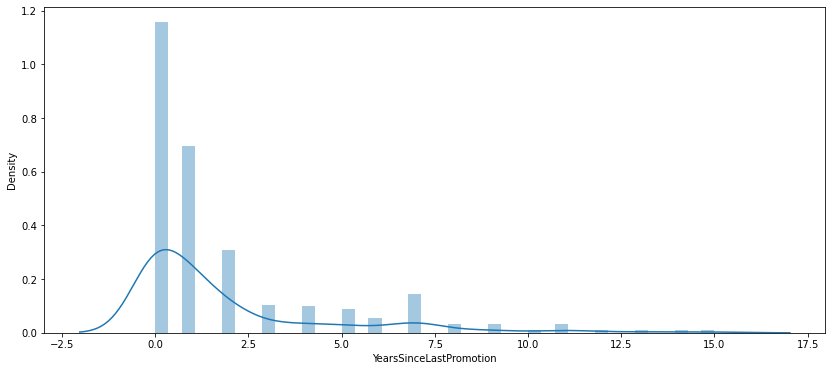

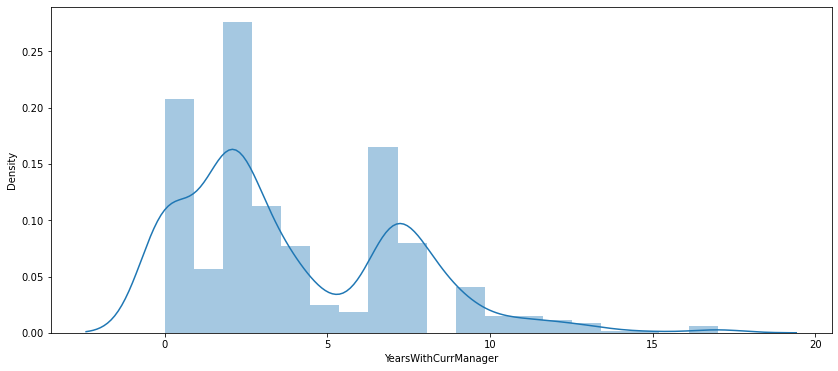

In [123]:
for i in box1:
    plt.figure(figsize=(14,6))
    sns.distplot(merged[i])

All three columns have outliers. 

In [125]:
outlier_IQR3(merged, 'YearsInCurrentRole')

(-13.0, 22.0)

In [126]:
merged[merged['YearsInCurrentRole']>22.0].shape

(0, 43)

In [127]:
outlier_IQR3(merged, 'YearsSinceLastPromotion')

(-6.0, 8.0)

In [128]:
merged[merged['YearsSinceLastPromotion']>8.0].shape

(56, 43)

In [129]:
merged = merged[merged['YearsSinceLastPromotion']<=8.0]

In [130]:
outlier_IQR3(merged, 'YearsWithCurrManager')

(-13.0, 22.0)

In [131]:
merged[merged['YearsWithCurrManager']>22.0].shape

(0, 43)

Treated Outliers for all the columns.

In [132]:
merged.shape

(1289, 43)

Using the Outlier method we remove 13.4 % data. We will move forward with IQR method.

# DEALING WITH DATA IMBALANCE PROBLEM.

In [133]:
x = merged.drop('Attrition',axis=1)
y = merged['Attrition']

## Method1:  UnderSampling.

In [134]:
att_yes = merged[merged['Attrition']==1]
att_no = merged[merged['Attrition']==0]

In [135]:
att_yes.shape

(220, 43)

In [136]:
att_no.shape

(1069, 43)

We would want 220 samples from att_no.

In [137]:
Under_sample = att_no.sample(220)

In [138]:
test_under = pd.concat([Under_sample, att_yes], axis=0)

In [139]:
test_under['Attrition'].value_counts()

1    220
0    220
Name: Attrition, dtype: int64

We have created a new DataFrame with same amount of Yes and No Attrition data.

In [140]:
x1 = test_under.drop('Attrition', axis=1)
y1 = test_under['Attrition']

## Finding the best random state for the model


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [143]:
maxAccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.7727272727272727 on random state 73


# Method 2: OverSampling

In [144]:
over_sample = att_yes.sample(1069, replace=True)

In [145]:
over_sample.shape

(1069, 43)

In [146]:
att_no.shape

(1069, 43)

We got equal number of values.

In [147]:
test_over = pd.concat([att_no, over_sample], axis=0)

In [149]:
test_over['Attrition'].value_counts()

1    1069
0    1069
Name: Attrition, dtype: int64

We have created a new DataFrame with same amount of Yes and No Attrition data.

In [150]:
x2 = test_over.drop('Attrition', axis=1)
y2 = test_over['Attrition']

## Finding the best random state for the model


In [152]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.9532710280373832 on random state 51


**The accuracy have been improved drastically from 77.77% to 95.32%.**

In [153]:
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.20,random_state=51)

We will come up with a best model with this method.

## Testing models

In [154]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7266355140186916
[[145  54]
 [ 63 166]]
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       199
           1       0.75      0.72      0.74       229

    accuracy                           0.73       428
   macro avg       0.73      0.73      0.73       428
weighted avg       0.73      0.73      0.73       428



In [155]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.9532710280373832
[[181  18]
 [  2 227]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       199
           1       0.93      0.99      0.96       229

    accuracy                           0.95       428
   macro avg       0.96      0.95      0.95       428
weighted avg       0.96      0.95      0.95       428



In [157]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.9836448598130841
[[194   5]
 [  2 227]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       199
           1       0.98      0.99      0.98       229

    accuracy                           0.98       428
   macro avg       0.98      0.98      0.98       428
weighted avg       0.98      0.98      0.98       428



In [156]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.822429906542056
[[156  43]
 [ 33 196]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       199
           1       0.82      0.86      0.84       229

    accuracy                           0.82       428
   macro avg       0.82      0.82      0.82       428
weighted avg       0.82      0.82      0.82       428



In [158]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7219626168224299
[[106  93]
 [ 26 203]]
              precision    recall  f1-score   support

           0       0.80      0.53      0.64       199
           1       0.69      0.89      0.77       229

    accuracy                           0.72       428
   macro avg       0.74      0.71      0.71       428
weighted avg       0.74      0.72      0.71       428



In [159]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.4649532710280374
[[199   0]
 [229   0]]
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       199
           1       0.00      0.00      0.00       229

    accuracy                           0.46       428
   macro avg       0.23      0.50      0.32       428
weighted avg       0.22      0.46      0.30       428



In [160]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.9158878504672897
[[184  15]
 [ 21 208]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       199
           1       0.93      0.91      0.92       229

    accuracy                           0.92       428
   macro avg       0.92      0.92      0.92       428
weighted avg       0.92      0.92      0.92       428



Random forest performed really well. However, Let's crossvalidate.

# Crossvalidation


In [161]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.85492413959521


In [162]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.7905347932313818


In [163]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.8114710584260851


In [164]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.8425210388200162


In [165]:
ad = cross_val_score(ad, x, y, cv=5)

print("Cross validation score of AdaBoost Classifier:", rfc.mean())

Cross validation score of AdaBoost Classifier: 0.85492413959521


In [166]:
gb = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost Classifier:", rfc.mean())

Cross validation score of GradientBoost Classifier: 0.85492413959521


Looking at the values Random forest has more promising results with crosvalidation score of 85.49% and model accuracy of 98.36%. We will Perform Hyperparameter Tuning 

## Hyperparameter Tuning

In [167]:
from sklearn.model_selection import RandomizedSearchCV

In [168]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'criterion':['gini', 'entropy'],'max_depth': np.arange(2,10),
             'max_features':['auto','sqrt', 'log2'],'n_estimators':[10,50,100,150] }

In [169]:
RCV = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [170]:
#Printing the best parameters.
RCV.best_params_

{'n_estimators': 50,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini'}

## Final Model

In [171]:
model1 = RandomForestClassifier(n_estimators=50, max_features= 'auto', max_depth= 9, criterion= 'gini')
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

96.96261682242991
[[190   9]
 [  4 225]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       199
           1       0.96      0.98      0.97       229

    accuracy                           0.97       428
   macro avg       0.97      0.97      0.97       428
weighted avg       0.97      0.97      0.97       428



**Awesome we got 96.96% Accuracy. Let's see if we get good performance with SMOTE.**

# Method 3: SMOTE

In [172]:
from imblearn.over_sampling import SMOTE

In [173]:
y.value_counts()

0    1069
1     220
Name: Attrition, dtype: int64

In [174]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_sample(x,y)

y_sm.value_counts()

1    1069
0    1069
Name: Attrition, dtype: int64

## Finding the best random state for the model


In [176]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.8691588785046729 on random state 182


The accuracy is low then OverSampling method, however, cannot conclude just yet.

In [177]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,random_state=182)

## Testing models

In [178]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8691588785046729
[[186  27]
 [ 29 186]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       213
           1       0.87      0.87      0.87       215

    accuracy                           0.87       428
   macro avg       0.87      0.87      0.87       428
weighted avg       0.87      0.87      0.87       428



In [179]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8574766355140186
[[169  44]
 [ 17 198]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       213
           1       0.82      0.92      0.87       215

    accuracy                           0.86       428
   macro avg       0.86      0.86      0.86       428
weighted avg       0.86      0.86      0.86       428



In [180]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.9228971962616822
[[205   8]
 [ 25 190]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       213
           1       0.96      0.88      0.92       215

    accuracy                           0.92       428
   macro avg       0.93      0.92      0.92       428
weighted avg       0.93      0.92      0.92       428



In [181]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8925233644859814
[[189  24]
 [ 22 193]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       213
           1       0.89      0.90      0.89       215

    accuracy                           0.89       428
   macro avg       0.89      0.89      0.89       428
weighted avg       0.89      0.89      0.89       428



In [182]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7149532710280374
[[129  84]
 [ 38 177]]
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       213
           1       0.68      0.82      0.74       215

    accuracy                           0.71       428
   macro avg       0.73      0.71      0.71       428
weighted avg       0.73      0.71      0.71       428



In [183]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.5046728971962616
[[189  24]
 [188  27]]
              precision    recall  f1-score   support

           0       0.50      0.89      0.64       213
           1       0.53      0.13      0.20       215

    accuracy                           0.50       428
   macro avg       0.52      0.51      0.42       428
weighted avg       0.52      0.50      0.42       428



In [184]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.9182242990654206
[[206   7]
 [ 28 187]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       213
           1       0.96      0.87      0.91       215

    accuracy                           0.92       428
   macro avg       0.92      0.92      0.92       428
weighted avg       0.92      0.92      0.92       428



Random forest performed well in this method as well. However, Let's crossvalidate.

# Crossvalidation

In [185]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.8525985581998612


In [186]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.7758030947425572


In [187]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.8114710584260851


In [188]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.8425210388200162


In [189]:
ad = cross_val_score(ad, x, y, cv=5)

print("Cross validation score of AdaBoost Classifier:", rfc.mean())

Cross validation score of AdaBoost Classifier: 0.8525985581998612


In [190]:
gb = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost Classifier:", rfc.mean())

Cross validation score of GradientBoost Classifier: 0.8525985581998612


All same results with tree algorithms. Let's use random Forest here as well.

## Hyperparameter Tuning

In [191]:
from sklearn.model_selection import RandomizedSearchCV

In [192]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'criterion':['gini', 'entropy'],'max_depth': np.arange(2,10),
             'max_features':['auto','sqrt', 'log2'],'n_estimators':[10,50,100,150] }

In [193]:
RCV = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [194]:
#Printing the best parameters.
RCV.best_params_

{'n_estimators': 100,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'entropy'}

## Final Model

In [195]:
model2 = RandomForestClassifier(n_estimators=100, max_features= 'log2', max_depth= 8, criterion= 'entropy')
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

90.88785046728972
[[203  10]
 [ 29 186]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       213
           1       0.95      0.87      0.91       215

    accuracy                           0.91       428
   macro avg       0.91      0.91      0.91       428
weighted avg       0.91      0.91      0.91       428



# CONCLUSION.

We got 90.88& accuracy. However, Method 2- OverSampling gave us a better accuracy. We will use that mode and submit the project.

# SAVING THE BEST MODEL FOR SUBMISSION.

model1 from Method 2- OverSampling would be the best model with 96.96% accuracy. model2 has less accuracy comparetively(90.88%)

In [197]:
import joblib
joblib.dump(model1,"HR_Analytics_Project_submission.pkl")

['HR_Analytics_Project_submission.pkl']